In [1]:
import os, glob
import numpy as np
import matplotlib. pyplot as plt
import pandas as pd
import seaborn as sns
from skimage.io import imread, imsave
from tqdm.notebook import tqdm
from scipy.fftpack import dct
import pickle
from skimage.morphology import remove_small_holes, binary_dilation, disk, binary_erosion

from matplotlib import rc
plt.rcParams.update({'font.size': 15})
rc('font', size=12)
rc('font', family='Arial')
# plt.style.use('dark_background')
rc('pdf', fonttype=42)

In [2]:
folders = [
    'input',
    'restored_with_model_2dpf_1fish_patches32x128x128_2layers',
    'restored_with_model_3dpf_1fish_patches32x128x128_2layers',
    'restored_with_model_4dpf_1fish_patches32x128x128_2layers'
]

filelists = [
    glob.glob(os.path.join(f,'*.tif')) for f in folders
]

_ = [f.sort() for f in filelists]

In [3]:
def img_info(patch):

    _dct = dct(dct(dct(patch).transpose(0,2,1)).transpose(1,2,0)).transpose(1,2,0).transpose(0,2,1)
    _dct = _dct**2/(_dct.shape[0]*_dct.shape[1]*_dct.shape[2])
    _dct = _dct/np.sum(_dct)
    _dct = _dct.flatten()
    entropy = -np.sum(_dct*np.log2(1e-6+_dct))
    
    return entropy

In [4]:
from skimage.measure import shannon_entropy
info_file_name = 'info_content_tl_patch_REG.pickle'

if not os.path.exists(info_file_name):
    infoss = []
    for filelist in filelists:
        infos = []
        for file in tqdm(filelist, leave=True):
            img = imread(file)
            if len(img.shape)==4:
                img = img[0]
            img = img[:]
            info = np.zeros( ( 
                                np.arange(img.shape[0]-2).shape[0], 
                                np.arange(0,img[0].shape[0],32).shape[0],
                                np.arange(0,img[0].shape[1],32).shape[0],
            ))
            i=0
            for z in tqdm(range(img.shape[0]-2), leave=False):
                ### patches
                j=0
                planes = img[z:z+2]
                for r in range(0,planes.shape[1],32):
                    k=0
                    for c in range(0,planes.shape[2],32):
#                         print(i,j,k,r,c, planes.shape)
                        info[i,j,k] = img_info(planes[:,r:r+32, c:c+32])
                        k+=1
                    j+=1
                i+=1
                
#             info = []
#             for z in tqdm(range(img.shape[0]-2), leave=False):
#                 ### regular
#                 planes = img[z:z+2,:]#150:1800,150:700]
#                 info.append(img_info(planes))
#                 ### entropy
#                 plane = img[z]
#                 info.append(shannon_entropy(plane))
                

            infos.append(info)
        infoss.append(np.array(infos))
    with open(info_file_name, 'wb') as handle:
        pickle.dump(infoss, handle, protocol=pickle.HIGHEST_PROTOCOL)   
else:
    with open(info_file_name, 'rb') as f:
        infoss = pickle.load(f)

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

In [5]:
print(len(infoss))
print(infoss[0].shape)

4
(29, 118, 61, 43)


<IPython.core.display.Javascript object>


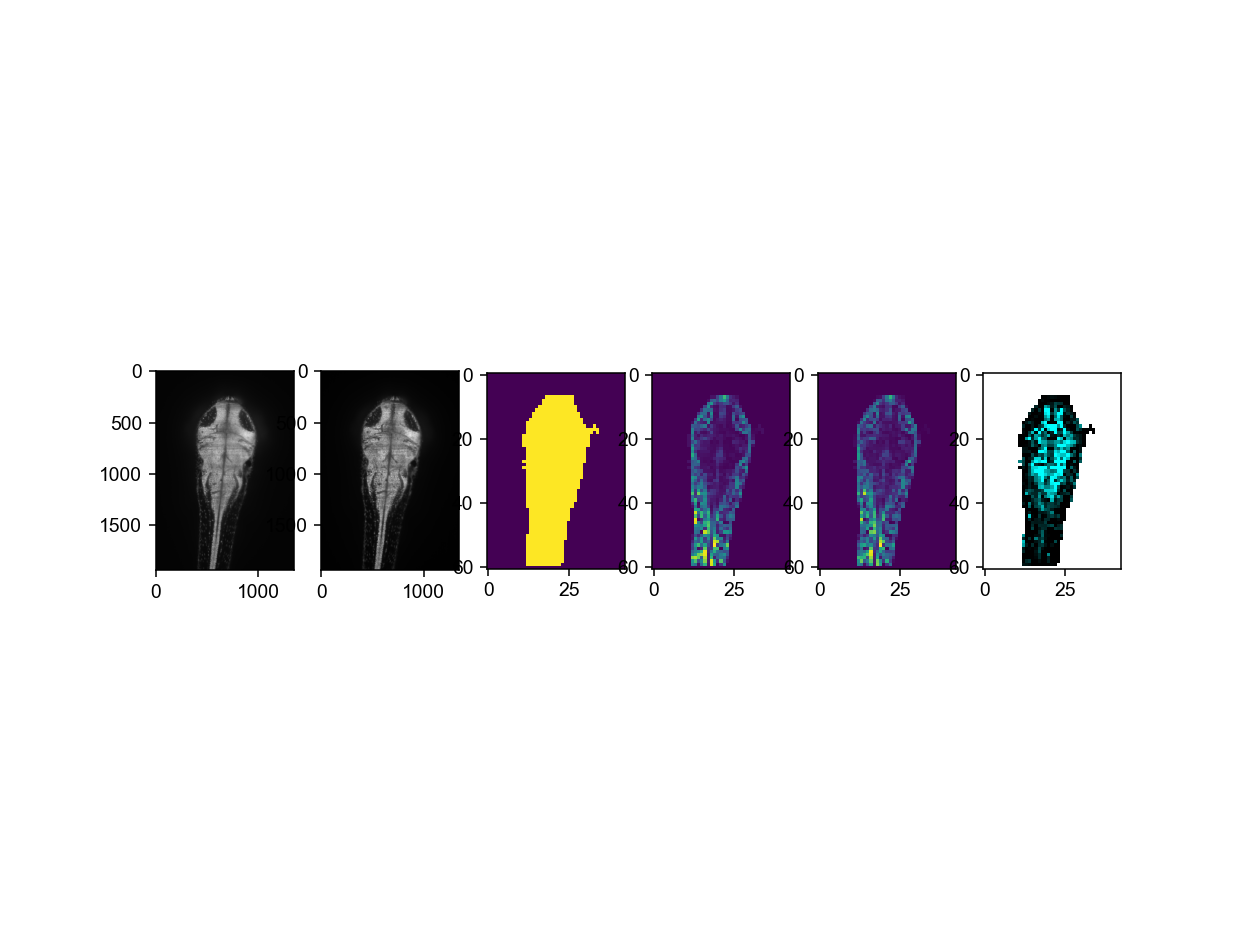

C:\Users\gritti\AppData\Local\Temp/ipykernel_10308/1935460969.py:31: RuntimeWarning: invalid value encountered in true_divide
  ax[5].imshow(planes[1]/planes[0], cmap=cmap, clim=(1.,2.))


In [6]:
%matplotlib notebook
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'cyan'])
tp = 15
plane = 60
info_thr = 0.05

img0 = imread(filelists[0][tp])[plane]
img1 = imread(filelists[1][tp])[0][plane]

planes = [i[tp][plane].copy() for i in infoss]

mask = planes[0]>info_thr
mask = binary_dilation(mask,disk(1))
mask = np.pad(mask,100)
mask = remove_small_holes(mask, 1000)
mask = binary_erosion(mask,disk(1))
mask = mask[100:-100,100:-100]

planes[0][mask==False] = 0.
planes[1][mask==False] = 0.
planes[2][mask==False] = 0.
planes[3][mask==False] = 0.

fig, ax = plt.subplots(1,6)
ax[0].imshow(img0, cmap='gray')
ax[1].imshow(img1, cmap='gray')
ax[2].imshow(mask)
ax[3].imshow(planes[0])
ax[4].imshow(planes[1])
ax[5].imshow(planes[1]/planes[0], cmap=cmap, clim=(1.,2.))

# ax[3].imshow(planes[1])
# ax[4].imshow(planes[2])
# ax[5].imshow(planes[3])



In [7]:
rel_info = []

for tp in range(infoss[0].shape[0]):
    
    rel_info_tp = []
    
    for z in range(infoss[0].shape[1]):
        
        plane0 = infoss[0][tp,z].copy()
        
        mask = plane0>info_thr
        mask = binary_dilation(mask,disk(1))
        mask = np.pad(mask,10)
        mask = remove_small_holes(mask, 1000)
        mask = binary_erosion(mask,disk(2))
        mask = mask[10:-10,10:-10]
        
        plane0[mask==False] = 0.
        
        plane1 = infoss[1][tp,z].copy()
        plane1[mask==False] = 0.
        
        rel = plane1/plane0
#         rel = rel.ravel()
#         rel = rel[rel>0.5]
        
        rel_info_plane = np.nanmean(rel)
        rel_info_tp.append(rel_info_plane)

    rel_info.append(rel_info_tp)

rel_info = np.array(rel_info)
    
print(rel_info[0,60])

C:\Users\gritti\AppData\Local\Temp/ipykernel_10308/27081627.py:23: RuntimeWarning: invalid value encountered in true_divide
  rel = plane1/plane0
C:\Users\gritti\AppData\Local\Temp/ipykernel_10308/27081627.py:27: RuntimeWarning: Mean of empty slice
  rel_info_plane = np.nanmean(rel)


1.3972926982575251


<IPython.core.display.Javascript object>


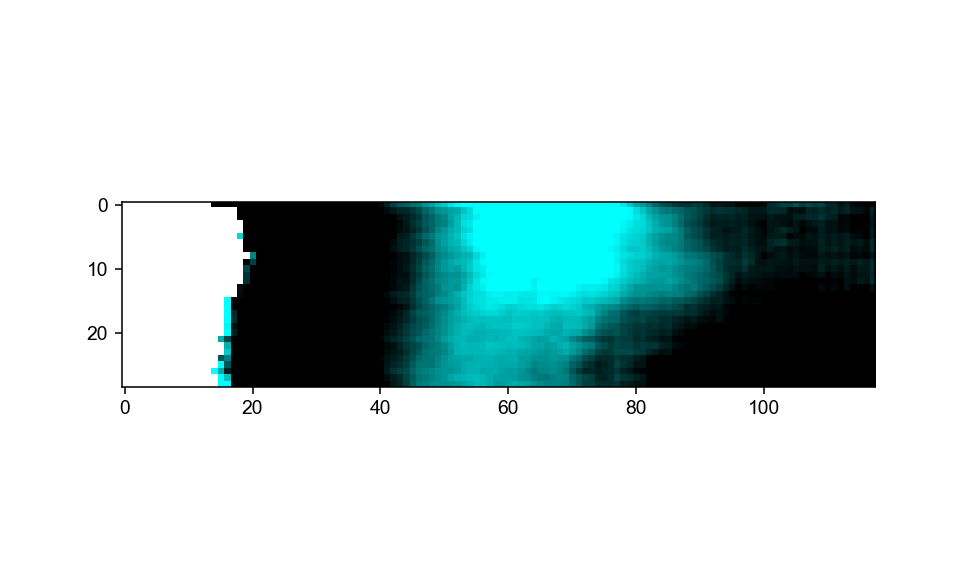

1.0147506386420617


In [8]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
clims = (1.,1.3)

from matplotlib.colors import LinearSegmentedColormap
cmaps = [
    LinearSegmentedColormap.from_list('mycmap', ['red', 'black', 'cyan']),
    LinearSegmentedColormap.from_list('mycmap', ['black', 'cyan']),
    LinearSegmentedColormap.from_list('mycmap', ['red', 'darkred', 'black', 'cyan', 'cyan'])]
ax.imshow(rel_info[:,:], cmap=cmaps[1], clim=clims)
    
print(rel_info[0,40])

In [9]:
if not os.path.exists('info_content_tl_REG.pickle'):
    infoss = []
    for filelist in filelists:
        infos = []
        for file in tqdm(filelist, leave=True):
            img = imread(file)
            if len(img.shape)==4:
                img = img[0]
            img = img[20:]
            info = []
            for z in tqdm(range(img.shape[0]-2), leave=False):
                planes = img[z:z+2,250:1500,350:900]
                info.append(img_info(planes))
            infos.append(info)
        infoss.append(np.array(infos))
    with open('info_content_tl_REG.pickle', 'wb') as handle:
        pickle.dump(infoss, handle, protocol=pickle.HIGHEST_PROTOCOL)   
else:
    with open('info_content_tl_REG.pickle', 'rb') as f:
        infoss = pickle.load(f)

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

In [10]:
from skimage.transform import resize

infoss = [resize(infos, (29,98), order=2) for infos in infoss]

# infoss = [(infos-infoss[0])/infoss[0] for infos in infoss]
infoss = [infos/infoss[0] for infos in infoss]

C:\Users\gritti\.conda\envs\nicola\lib\site-packages\skimage\transform\_warps.py:176: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  out = warp(image, tform, output_shape=output_shape, order=order,


In [11]:
fig,ax = plt.subplots(1,4,figsize=(50,100))
for i in range(4):
    ax[i].imshow(infoss[i], cmap='seismic', clim=(0.5,1.5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


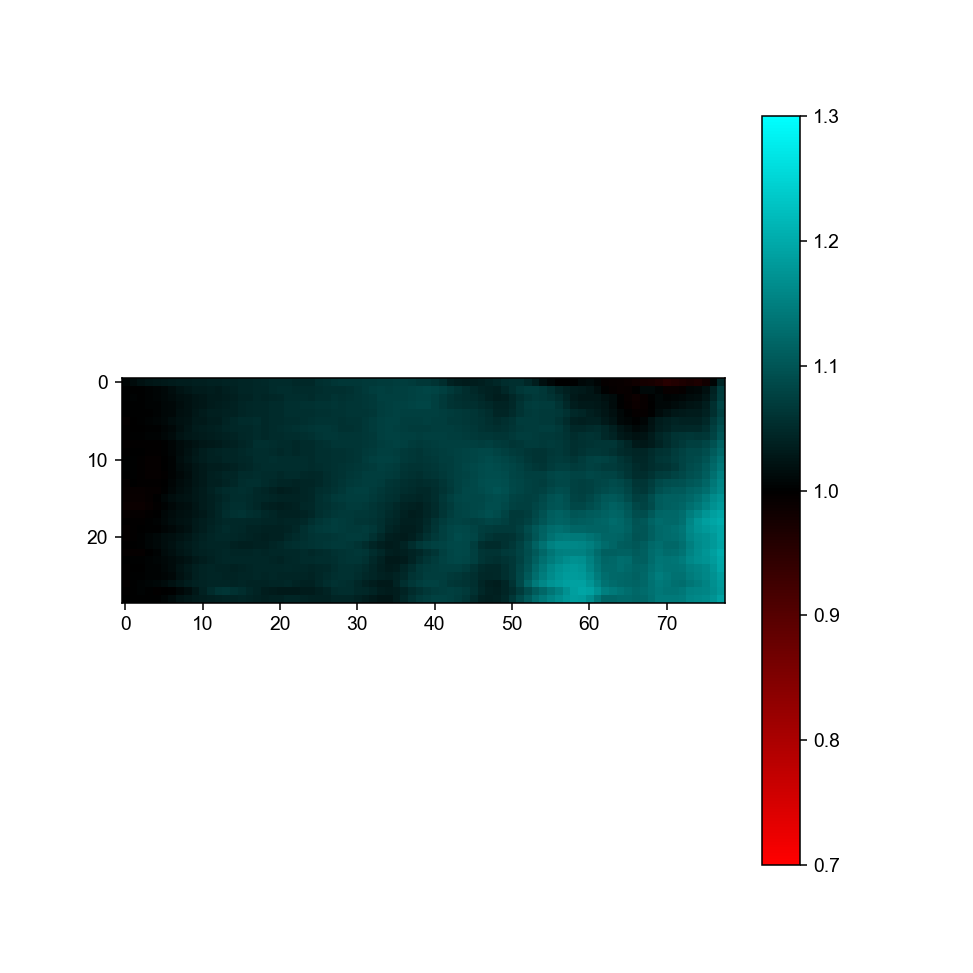

In [12]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', ['red', 'black', 'cyan'])

infos_rest_max = infoss[1]

fig,ax = plt.subplots(1,1,figsize=(5,5))
a=ax.imshow(infos_rest_max[:,20:], cmap=cmap, clim=(0.7,1.3))

plt.colorbar(a)

fig.savefig('info_gain_REG.pdf', dpi=600)

In [13]:
print([(i, np.max(infos_rest_max[i])) for i in range(infos_rest_max.shape[0])])

[(0, 1.072417878113393), (1, 1.0811615410475752), (2, 1.078649509823978), (3, 1.0802369261878213), (4, 1.0759388532248646), (5, 1.0860259863835868), (6, 1.0931290200798203), (7, 1.0993006264721839), (8, 1.1127752520251097), (9, 1.121953841912726), (10, 1.131423394333438), (11, 1.1394427713473654), (12, 1.1491033818536724), (13, 1.1560226046087063), (14, 1.1599404489900524), (15, 1.1728296864947685), (16, 1.1781544028549111), (17, 1.193807739007166), (18, 1.1993905285786362), (19, 1.1940294245698369), (20, 1.1927894257711948), (21, 1.1919881531599168), (22, 1.2014196427669026), (23, 1.1956111747764682), (24, 1.1921895114369454), (25, 1.1848541949227254), (26, 1.1896272181764378), (27, 1.1939928667261896), (28, 1.1880108922617414)]


  0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


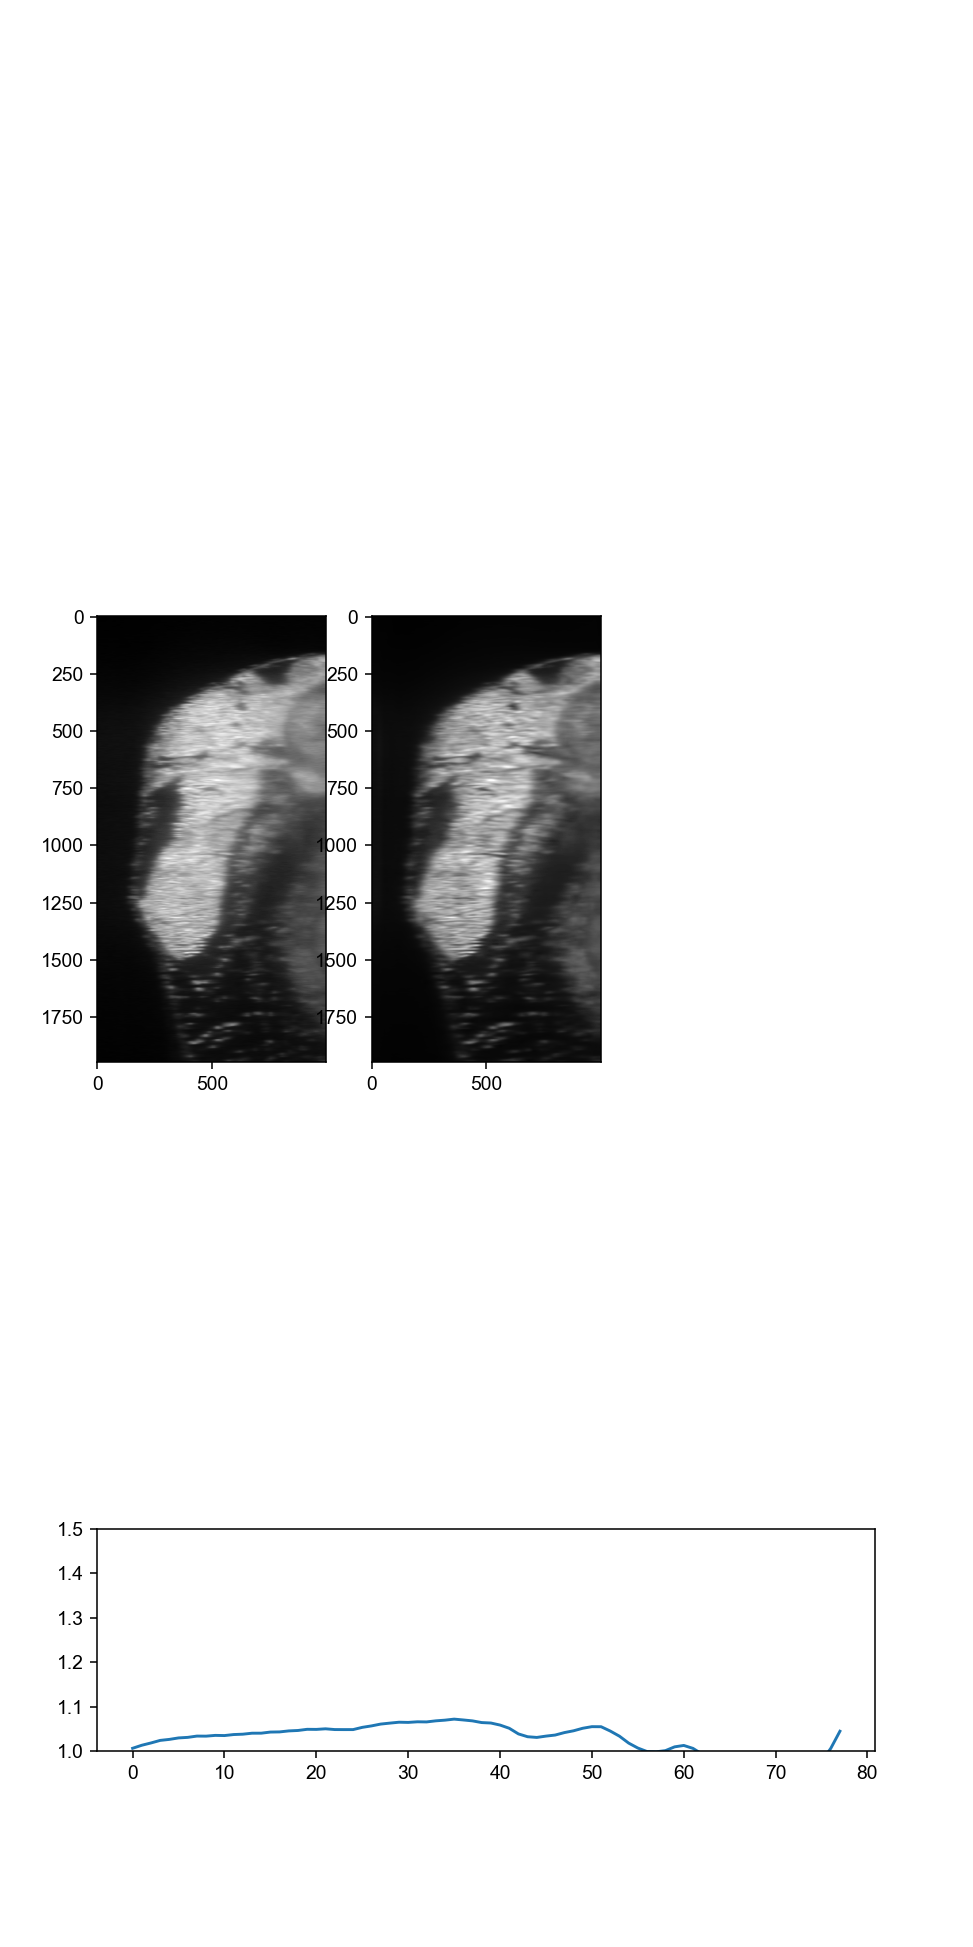

  0%|          | 0/2 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


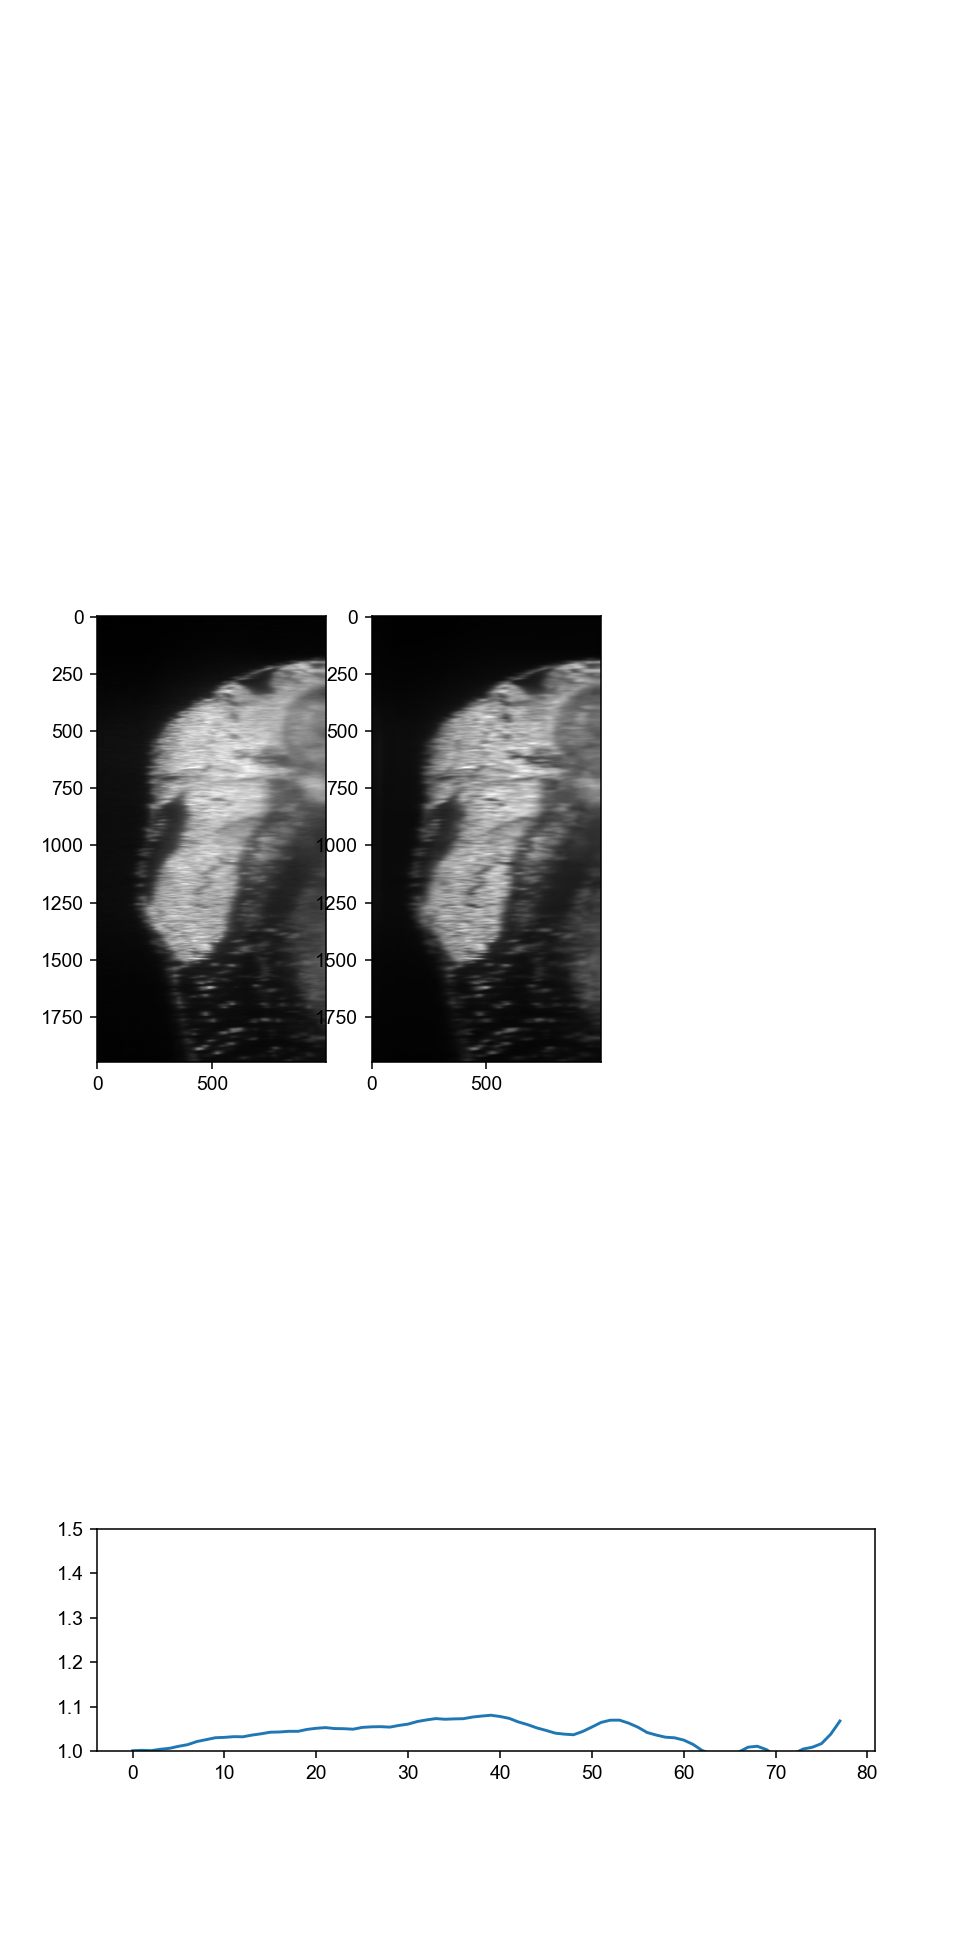

  0%|          | 0/2 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


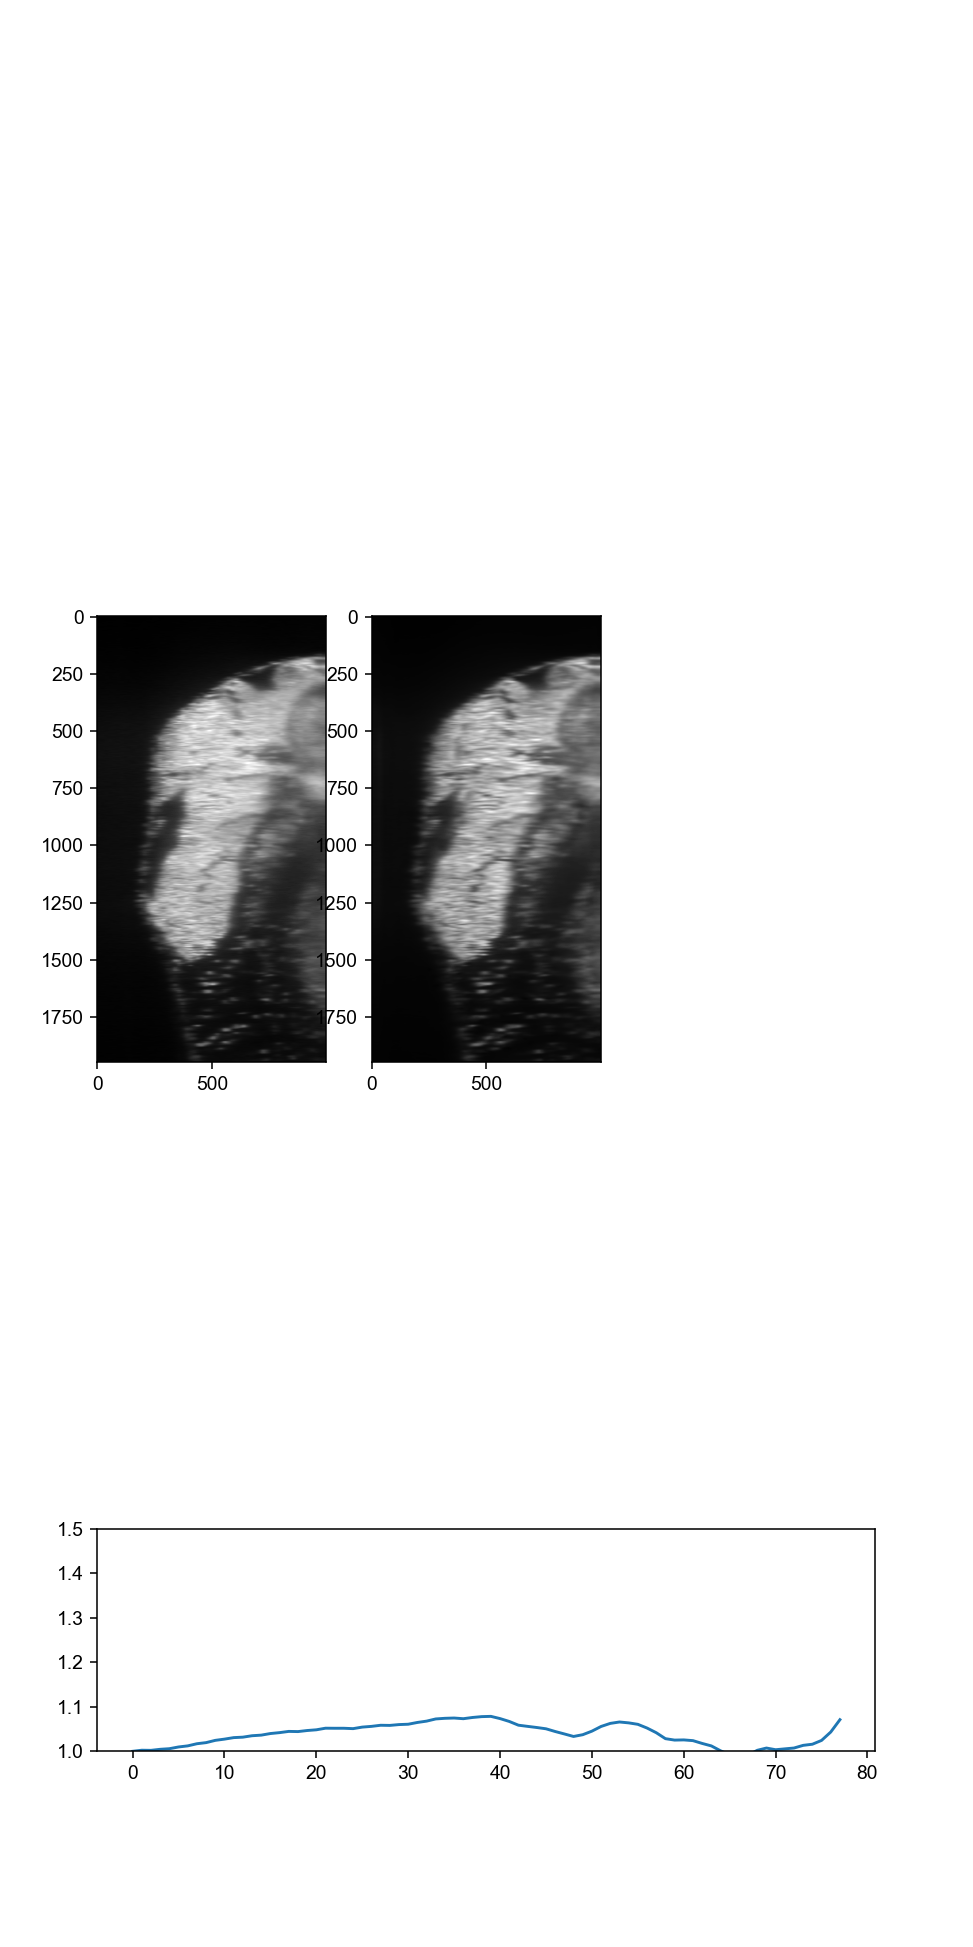

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:



for i, idx in tqdm(enumerate([9, 17, 20]), total=3):
    fig = plt.figure(figsize=(5,10))
    gs = fig.add_gridspec(6, 3)
    ax1 = fig.add_subplot(gs[0:-1, 0])
    ax2 = fig.add_subplot(gs[0:-1, 1])
    ax3 = fig.add_subplot(gs[-1, :])
    
    fig.subplots_adjust(right=0.9, left=0.1, top=0.9, bottom=0.1)#, wspace=0.2)
    
    ax = [ax1,ax2,ax3]
#     fig, ax = plt.subplots(3,3, figsize=(5,15))
    for j, filelist in tqdm(enumerate(filelists[:2]), leave=False, total=2):
        img = imread(filelist[i])
        if len(img.shape)==4:
            img = img[0]
        ax[j].imshow(resize(img[:,:,650],(1000,1947), order=1, preserve_range=True).T, 
                       cmap='gray',
                       clim=(100,2000))
    ax[2].plot(infos_rest_max[i][20:])
    ax[2].set_ylim(1.,1.5)
    
    fig.savefig('comparison_%d_REG.pdf'%i, dpi=600)

<IPython.core.display.Javascript object>


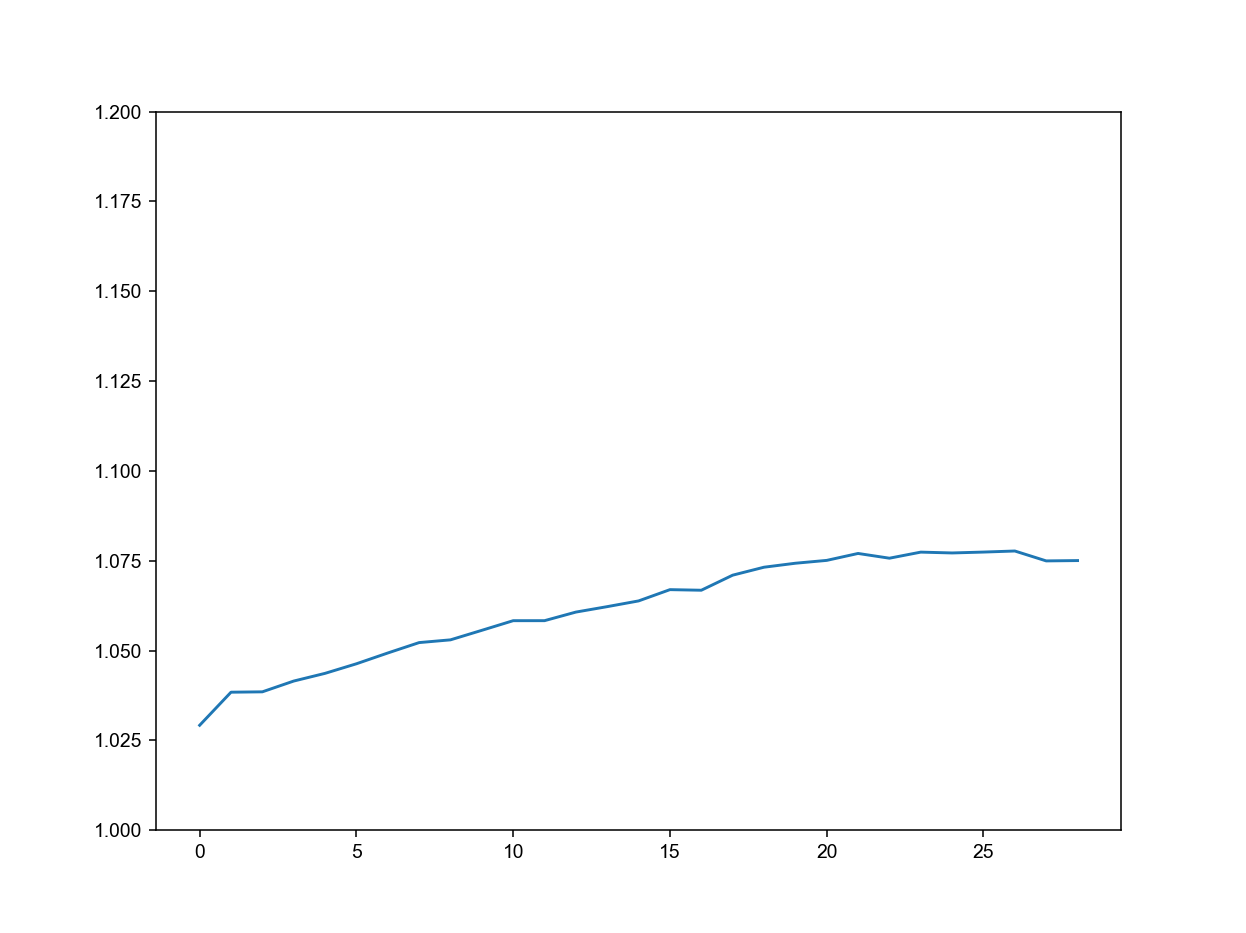

In [15]:
fig,ax = plt.subplots()
ax.plot(np.mean(infos_rest_max[:,20:],1))
ax.set_ylim(1.0,1.2)
fig.savefig('info_content_vs_t_REG.pdf')

<IPython.core.display.Javascript object>


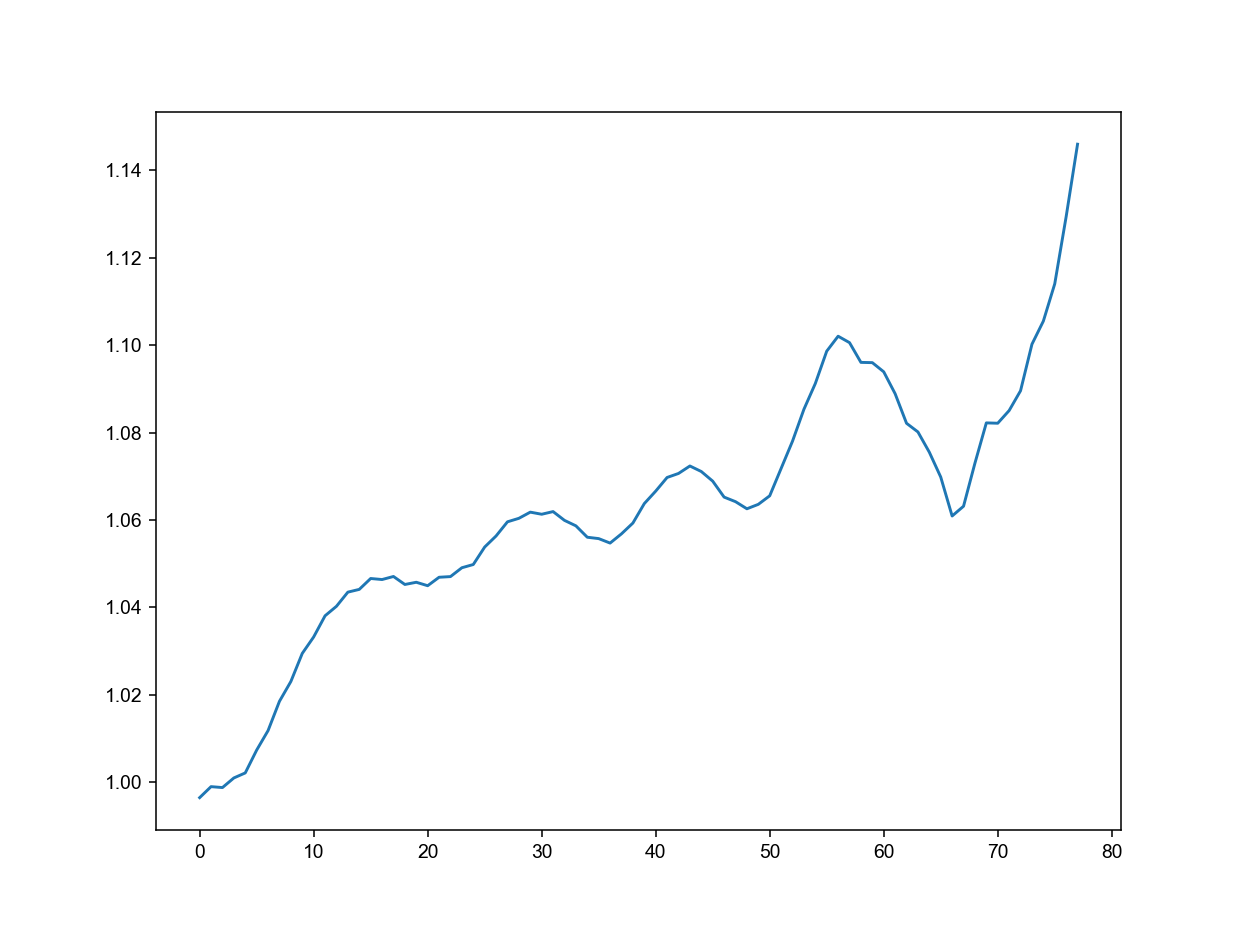

In [16]:
fig,ax = plt.subplots()
ax.plot(np.mean(infos_rest_max[:,20:],0))
fig.savefig('info_content_vs_depth_REG.pdf')

In [17]:
img0 = np.stack([imread(f) for f in tqdm(filelists[0][::1])])
img1 = np.stack([imread(f)[0] for f in tqdm(filelists[1][::1])])

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

In [21]:

# img0 = imread(filelists[0][20])
# img1 = imread(filelists[1][20])[0]

import napari
# from napari_animation import AnimationWidget

v = napari.Viewer()
# animation_widget = AnimationWidget(v)
v.add_image(img0, scale=(5,1,1))
v.add_image(img1, scale=(5,1,1))
# v.window.add_dock_widget(animation_widget, area='right')
napari.run()